In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
adv = pd.DataFrame({
    "TV": [230.1, 44.5, 17.2, 151.5, 180.8],
    "Sales":[22.1, 10.4, 9.3, 18.5, 12.9]
}
)

adv

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


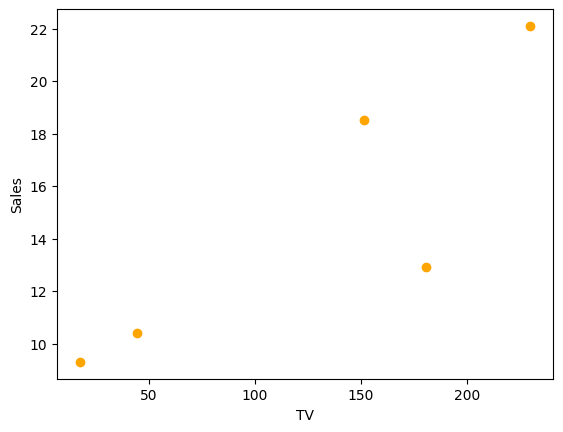

In [3]:
plt.scatter(
    x = adv['TV'],
    y = adv["Sales"],
    color = "orange"
)

plt.xlabel("TV")
plt.ylabel("Sales");

In [4]:
X = np.array(adv['TV'])
Y = np.array(adv['Sales'])

Vamos tentar encontrar os coeficientes de regressão linear $m$ e $b$, por meio da minimização da diferença entre os valores originais de $y^{(i)}$ e os valores previstos $\hat{y}^{(i)}$ com a **função de custo (loss Function)** $L\left(w, b\right)  = \frac{1}{2}\left(\hat{y}^{(i)} - y^{(i)}\right)^2$ para cada exemplo de treino. 

Para comparar o resultado das previsões $\hat{Y}$ com o vetor $Y$ de valores originais $y^{(i)}$, você pode pegar a média dos valores da função de custo para cada exemplo:

$$E\left(m, b\right) = \frac{1}{2n}\sum_{i=1}^{n} \left(\hat{y}^{(i)} - y^{(i)}\right)^2 = 
\frac{1}{2n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right)^2,\tag{1}$$

Essa função é conhecida como soma dos quadrados **cost function**. Para o usar o algoritmo de gradient descent, calcule as derivadas parciais de m e b:

\begin{align}
\frac{\partial E }{ \partial m } &= 
\frac{1}{n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right)x^{(i)},\\
\frac{\partial E }{ \partial b } &= 
\frac{1}{n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right),
\tag{2}\end{align}

e atualizado os parâmetros iterativamente, usando essas expressões

\begin{align}
m &= m - \alpha \frac{\partial E }{ \partial m },\\
b &= b - \alpha \frac{\partial E }{ \partial b },
\tag{3}\end{align}

onde  $\alpha$ é a taxa de aprendizado (learning rate).


Os arrays originais X e Y têm unidades diferentes. Para tornar o algoritmo de descida de gradiente eficiente, é necessário trazê-los para as mesmas unidades. Uma abordagem comum para isso é chamada de normalização: subtrair o valor médio do array de cada um dos elementos no array e dividi-los pelo desvio padrão (uma medida estatística da quantidade de dispersão de um conjunto de valores).

A normalização não é obrigatória - o algoritmo de descida de gradiente funcionaria sem ela. No entanto, devido às diferentes unidades de X e Y, a função de custo será muito mais íngreme. Nesse caso, seria necessário usar uma taxa de aprendizado $\alpha$ significativamente menor, e o algoritmo exigiria milhares de iterações para convergir em vez de algumas dezenas. A normalização ajuda a aumentar a eficiência do algoritmo de descida de gradiente.

A normalização é implementada no seguinte código:

In [6]:
X_norm = (X - np.mean(X))/np.std(X)
Y_norm = (Y - np.mean(Y))/np.std(Y)

In [7]:
# Funçaõ de custo
def E(m, b, X, Y):
    return 1/(2*len(Y))*np.sum((m*X + b - Y)**2)

In [8]:
def dEdm(m, b, X, Y):
    """
    Calcula a derivada parcial da função de erro em relação à inclinação (m) em uma regressão linear.

    Parâmetros:
    - m (float): Inclinação atual da reta de regressão.
    - b (float): Intercepto atual da reta de regressão.
    - X (array-like): Array contendo os valores da variável independente.
    - Y (array-like): Array contendo os valores da variável dependente.

    Retorna:
    - float: Derivada parcial da função de erro em relação à inclinação (m).
    """
    res = 1/len(Y) * np.dot((m*X + b - Y), X)
    return res

def dEdb(m, b, X, Y):
    """
    Calcula a derivada parcial da função de erro em relação ao intercepto (b) em uma regressão linear.

    Parâmetros:
    - m (float): Inclinação atual da reta de regressão.
    - b (float): Intercepto atual da reta de regressão.
    - X (array-like): Array contendo os valores da variável independente.
    - Y (array-like): Array contendo os valores da variável dependente.

    Retorna:
    - float: Derivada parcial da função de erro em relação ao intercepto (b).
    """
    res = 1/len(Y) * np.sum(m*X + b - Y)
    return res


In [9]:
print(dEdm(0, 0, X_norm, Y_norm))
print(dEdb(0, 0, X_norm, Y_norm))
print(dEdm(1, 5, X_norm, Y_norm))
print(dEdb(1, 5, X_norm, Y_norm))

-0.8576318592110517
2.2204460492503132e-17
0.14236814078894797
5.0


Agora vamos implementar a descida do gradiente

In [10]:
def gradient_descent(dEdm, dEdb, m, b, X, Y, learning_rate = 0.001, num_iterations = 1000, print_cost=False):
    for iteration in range(num_iterations):
        
        m_new = m - learning_rate * dEdm(m, b, X, Y)
        b_new = b - learning_rate * dEdb(m, b, X, Y)
        
        m = m_new
        b = b_new
        if print_cost:
            print (f"Cost after iteration {iteration}: {E(m, b, X, Y)}")
        
    return m, b

In [11]:
print(gradient_descent(dEdm, dEdb, 0, 0, X_norm, Y_norm))
print(gradient_descent(dEdm, dEdb, 1, 5, X_norm, Y_norm, learning_rate = 0.01, num_iterations = 10))

(0.5422845484413322, -4.3298697960382076e-19)
(0.9863870537929061, 4.521910375044022)


Vamos dar iniciar a descida com m e b iniciando em 0

In [13]:
m_initial = 0; b_initial = 0; num_iterations = 30; learning_rate = 1.2
m_gd, b_gd = gradient_descent(dEdm, dEdb, m_initial, b_initial, 
                              X_norm, Y_norm, learning_rate, num_iterations, print_cost=True)

print(f"Gradient descent result: m_min, b_min = {m_gd}, {b_gd}") 

Cost after iteration 0: 0.14694444515177355
Cost after iteration 1: 0.13282222295784452
Cost after iteration 2: 0.13225733407008733
Cost after iteration 3: 0.13223473851457704
Cost after iteration 4: 0.1322338346923566
Gradient descent result: m_min, b_min = 0.8579063014059991, 2.6645352591003756e-17


Lembre-se de que os conjuntos de dados iniciais foram normalizados. Para fazer as previsões, você precisa normalizar o array `X_pred`, calcular `Y_pred` com os coeficientes da regressão linear `m_gd` e `b_gd` e, em seguida, **desnormalizar** o resultado (realizar o processo inverso de normalização):

In [15]:
X_pred = np.array([50, 120, 175])
# Use the same mean and standard deviation of the original training array X
X_pred_norm = (X_pred - np.mean(X))/np.std(X)
Y_pred_gd_norm = m_gd * X_pred_norm + b_gd
# Use the same mean and standard deviation of the original training array Y
Y_pred_gd = Y_pred_gd_norm * np.std(Y) + np.mean(Y)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using Gradient Descent:\n{Y_pred_gd}")

TV marketing expenses:
[ 50 120 175]
Predictions of sales using Gradient Descent:
[10.76594126 14.39042819 17.23823934]


Mesmo resultado que obtivemos com o SkLearn e com o Numpy